In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="white", color_codes=True,font_scale=1.5)
%matplotlib inline

%load_ext autoreload
%autoreload 2

We import python functions from files

In [2]:
from functions_visu import *
from functions_cleaning import *

# Video Analysis

For now, the timestamps of the slide changes need to be find manually. Once this is done, paste the string here as a one liner or with a line break between each timestamp.

In [3]:
course_code = "bio-465"
week_number = "7"
part_number = "4"

slides_timestamp = '00:00:18,268 00:01:20,138 00:01:56,298 00:02:04,021 00:02:40,580 00:02:49,538 00:03:14,580 00:03:27,895 00:04:35,824 00:05:35,510 00:05:59,528 00:06:27,592 00:07:42,000'

In [4]:
slides_changes = time_to_seconds(slides_timestamp)
size_slide, slide_times, slide_timestamp = details_slides(slides_changes)
slides_number = len(slides_changes)-1

In [5]:
video_id = course_code + "_week" + week_number + "_part" + part_number
df_click_views_full = pd.read_csv('data/' + video_id + '_raw.csv')

# minimal time difference between source and target a seek to be considered as a valid one
minimal_jump = 10

# minimal duration (in seconds) between two seeks for them to be considered as separated ones
minimal_interval = 10

intervals = get_interval(slides_changes)

# Call of the functions
df_click_views = click_views(df_click_views_full,slides_changes,minimal_jump,minimal_interval,intervals)
df_click_views_jump = df_click_views[df_click_views['oldtime_slots'] != df_click_views['newtime_slots']].copy()
df_click_views_jump_json = df_click_views[df_click_views['oldtime_slots'] != df_click_views['newtime_slots']].copy()

# Creation of the JSON
fancy_timestamps = extract_fancy_timestamps(slides_timestamp)
df_norm, df_norm_clean = to_json(df_click_views,df_click_views_jump_json, video_id,
                                 size_slide, fancy_timestamps, slide_times)

Minimum Time Difference to be considered as a Seek : 10 seconds
Minimum interval between two different Seeks : 10 seconds
Percentage of jumps inside the same Slide :  26.6 %
Total number of Seeks :  109
Total number of Seeks between different Slides :  80

JSON successfully created.


# Visualisation

## Seeks

### Time Difference

Repartition of the seeks, by time difference.

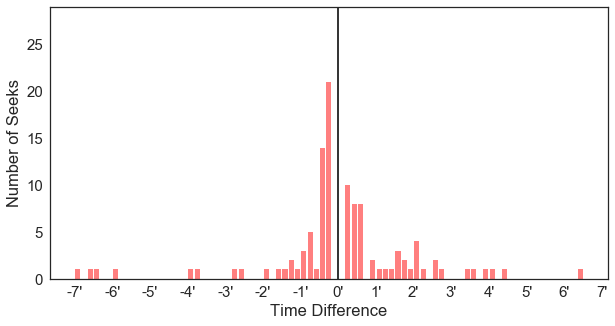

In [6]:
hist_time_diff(df_click_views)

### Slide Difference

Repartition of the seeks, by slide difference.

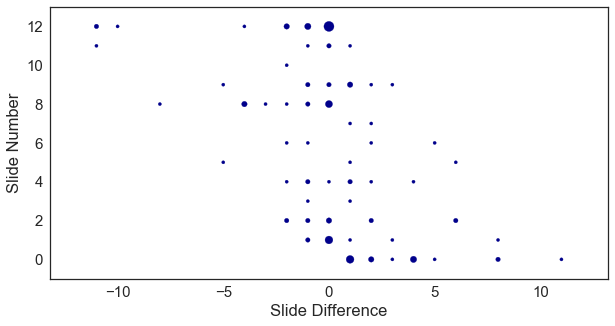

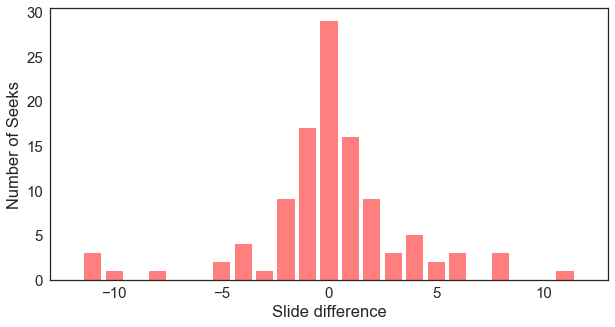

In [7]:
df_slot_diff_per_source = visu_slide_diff(df_click_views,slides_number)
scatter_slide_diff(df_slot_diff_per_source,df_click_views_jump,slides_number)
hist_slide_diff(df_click_views,slides_number)

### Seeks by Slide

Repartition of the seeks, by the number of incoming and outgoing seeks for each slide.

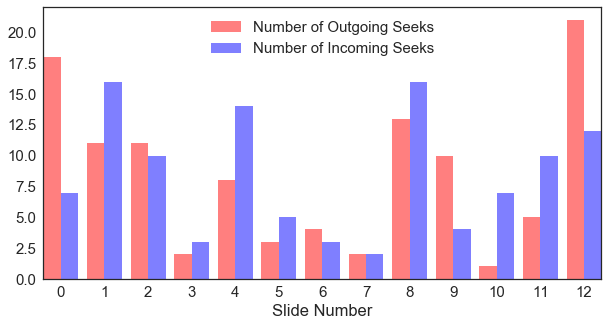

In [8]:
df_seeks_target = seeks_out_in(df_norm)

## Pauses & Plays

For each slide, total number of pauses as well as number of unique pausers (i.e. number of users who paused the video during this slide).

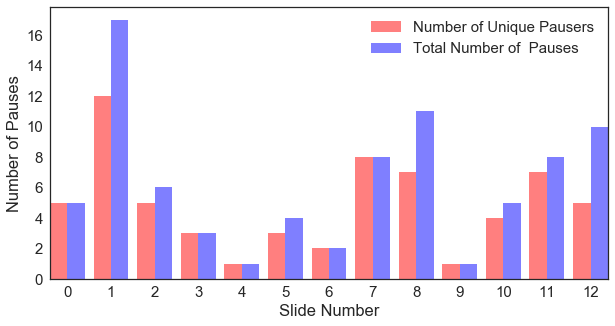

In [9]:
# maximum duration (in seconds) between a pause and the following play,
# in order for the event to be considered as valid.

max_pause_duration = 3600
df_final_pauses = pause_play(df_click_views_full,slides_changes, max_pause_duration, intervals)

## Comparison Seeks / Pauses

As explained in my report, we've decided to compare those two main events using only the number of Total Pauses, and the number of incoming Seeks, as those are the most relevant information.

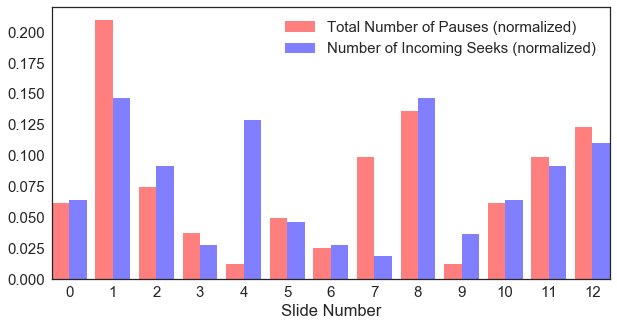

In [10]:
comparison(df_final_pauses,df_seeks_target)

## Others

### Slide Duration

The duration of the slides is not linear at all. Information about Seeks of Pauses can be biaised by the length of the slide.

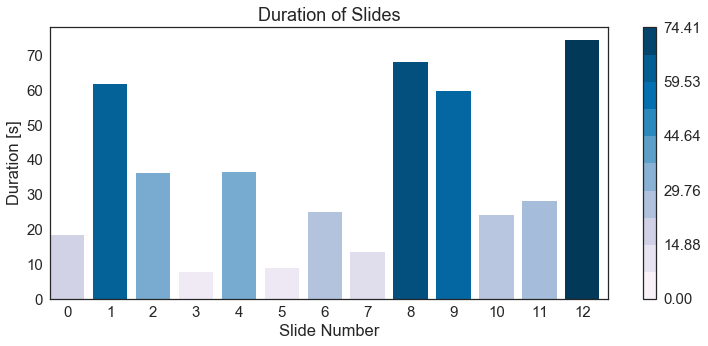

In [11]:
slide_duration_color(intervals)